In [66]:
import numpy as np
import pandas as pd
import random
import os
from copy import deepcopy
from functools import partial
from itertools import combinations
import gc
import holidays
import warnings
from datetime import datetime, timedelta
from tqdm.notebook import tqdm
from holidays import CountryHoliday
from sklearn.preprocessing import SplineTransformer

# Import libraries for Ploting
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn classes for model selection, cross validation, and performance evaluation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from collections import defaultdict
from sklearn.model_selection import cross_validate
from sklearn.ensemble import StackingRegressor
from typing import List

# Import libraries for Hypertuning
import optuna

#Import libraries for gradient boosting
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, LassoCV
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression, RidgeCV, ElasticNetCV
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cross_decomposition import PLSRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from catboost import Pool

# Useful line of code to set the display option so we could see all the columns in pd dataframe
pd.set_option('display.max_columns', None)

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Functions
def print_sl():
    print("=" * 50)
    print()

def show_na(df, column):
    sns.countplot(x='outcome', data=df[df[column].isnull()])
    plt.show() 

# Seaborn
rc = {
    # Background and edge colors
    "axes.facecolor": "#243139",
    "figure.facecolor": "#243139",
    "axes.edgecolor": "#000000",
    "grid.color": "#000000",
    "font.family": "arial",
    # Text colors
    "axes.labelcolor": "#FFFFFF",
    "xtick.color": "#FFFFFF",
    "ytick.color": "#FFFFFF",
    "axes.titlecolor": "#FFFFFF",  # Ensures titles are white
    # Grid transparency
    "grid.alpha": 0.4
}
sns.set(rc=rc)

In [65]:
train = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')

#train.drop('id',axis=1,inplace=True)
#test.drop('id',axis=1,inplace=True)

print('Data Loaded Succesfully!')
print_sl()

print(f'train shape: {train.shape}')
print(f'are there any null values in train: {train.isnull().any().any()}\n')

print(f'test shape: {test.shape}')
print(f'are there any null values in test: {test.isnull().any().any()}\n')

#num_cols = train.columns.delete(-1)

train['date'] = pd.to_datetime(train['date'])

# Sort by date
train = train.sort_values('date')

target = 'num_sold'
cat_features = ["country", "store", "product"]


train.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/playground-series-s5e1/train.csv'

In [47]:
!pip install category_encoders

# Import sklearn classes for model selection, cross validation, and performance evaluation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from collections import defaultdict
from sklearn.model_selection import cross_validate
from sklearn.ensemble import StackingRegressor
from typing import List



In [48]:
# Import libraries for Hypertuning
import optuna

In [49]:
!pip install catboost

#Import libraries for gradient boosting
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, LassoCV
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression, RidgeCV, ElasticNetCV
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cross_decomposition import PLSRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from catboost import Pool


In [50]:
# Useful line of code to set the display option so we could see all the columns in pd dataframe
pd.set_option('display.max_columns', None)

In [51]:
# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Functions
def print_sl():
    print("=" * 50)
    print()

def show_na(df, column):
    sns.countplot(x='outcome', data=df[df[column].isnull()])
    plt.show() 

# Seaborn
rc = {
    # Background and edge colors
    "axes.facecolor": "#243139",
    "figure.facecolor": "#243139",
    "axes.edgecolor": "#000000",
    "grid.color": "#000000",
    "font.family": "arial",
    # Text colors
    "axes.labelcolor": "#FFFFFF",
    "xtick.color": "#FFFFFF",
    "ytick.color": "#FFFFFF",
    "axes.titlecolor": "#FFFFFF",  # Ensures titles are white
    # Grid transparency
    "grid.alpha": 0.4
}
sns.set(rc=rc)

In [52]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

#train.drop('id',axis=1,inplace=True)
#test.drop('id',axis=1,inplace=True)

print('Data Loaded Succesfully!')
print_sl()

print(f'train shape: {train.shape}')
print(f'are there any null values in train: {train.isnull().any().any()}\n')

print(f'test shape: {test.shape}')
print(f'are there any null values in test: {test.isnull().any().any()}\n')

#num_cols = train.columns.delete(-1)

train['date'] = pd.to_datetime(train['date'])

# Sort by date
train = train.sort_values('date')

target = 'num_sold'
cat_features = ["country", "store", "product"]


train.head()


Data Loaded Succesfully!

train shape: (230130, 6)
are there any null values in train: True

test shape: (98550, 5)
are there any null values in test: False



,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
65,65,2010-01-01,Norway,Stickers for Less,Holographic Goose,579.0
64,64,2010-01-01,Norway,Discount Stickers,Kerneler Dark Mode,911.0
63,63,2010-01-01,Norway,Discount Stickers,Kerneler,791.0
62,62,2010-01-01,Norway,Discount Stickers,Kaggle Tiers,1525.0


In [53]:
# # Fill all the NaN as 0
train['num_sold'] = train['num_sold'].fillna(0)
train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,0.0
65,65,2010-01-01,Norway,Stickers for Less,Holographic Goose,579.0
64,64,2010-01-01,Norway,Discount Stickers,Kerneler Dark Mode,911.0
63,63,2010-01-01,Norway,Discount Stickers,Kerneler,791.0
62,62,2010-01-01,Norway,Discount Stickers,Kaggle Tiers,1525.0


In [54]:
# Drop all the NaN
print(f"Shape before dropping NaN categories: {len(train)}")
# Calculate NaN percentage for each category combination
nan_percentages = train.groupby(cat_features)['num_sold'].apply(
    lambda x: (x.isna().sum() / len(x)) * 100
).reset_index(name='nan_percentage')

# Get category combinations to drop (those with NaN values)
categories_to_drop = nan_percentages[nan_percentages['nan_percentage'] > 0]


# Drop rows with these category combinations from the original dataframe
for _, row in categories_to_drop.iterrows():
    mask = True
    for feat in cat_features:
        mask &= (train[feat] == row[feat])
    train = train[~mask]


print(f"Shape after dropping NaN categories: {len(train)}")
categories_to_drop.sort_values('nan_percentage')

Shape before dropping NaN categories: 230130
Shape after dropping NaN categories: 230130


,country,store,product,nan_percentage


# EDA

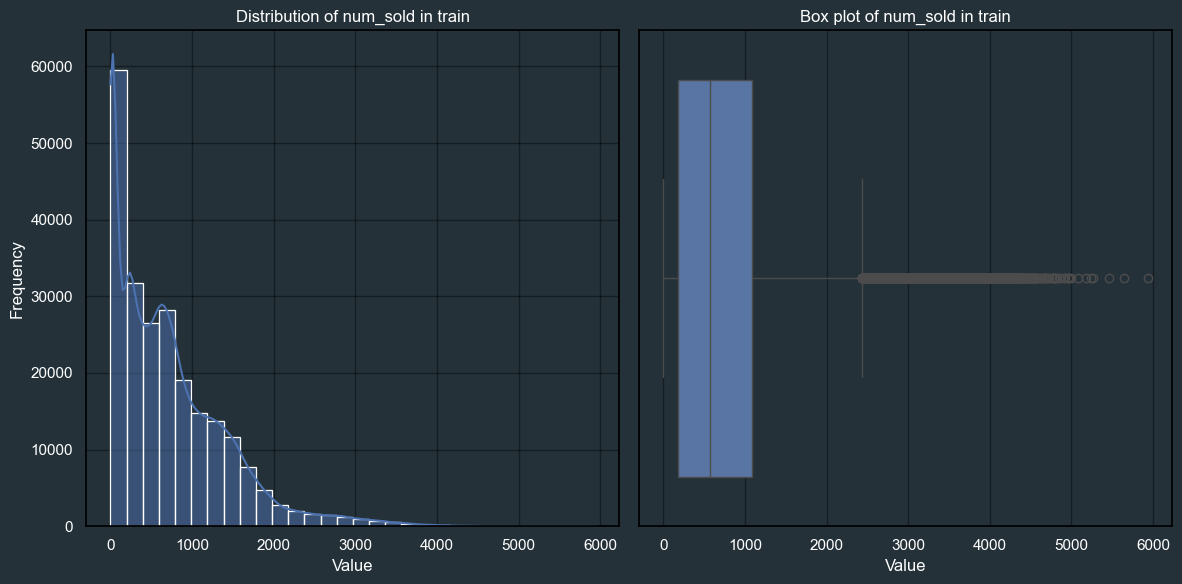

In [55]:
#Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#Histogram plot
sns.histplot(train.num_sold, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of num_sold in train')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

#box plot
sns.boxplot(x=train.num_sold,ax=axes[1])
axes[1].set_title('Box plot of num_sold in train')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


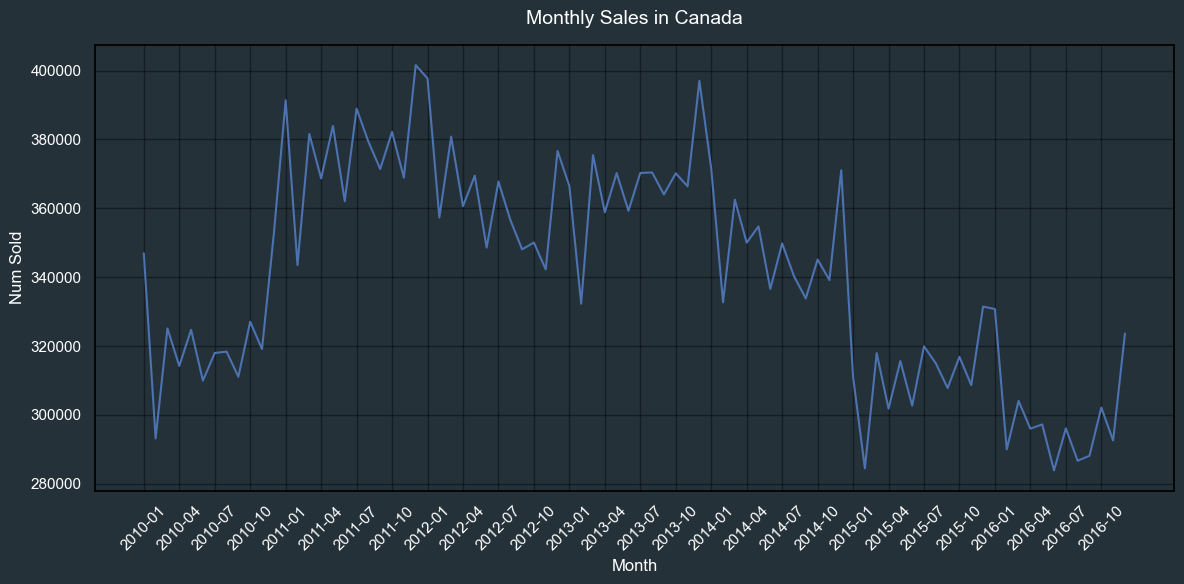

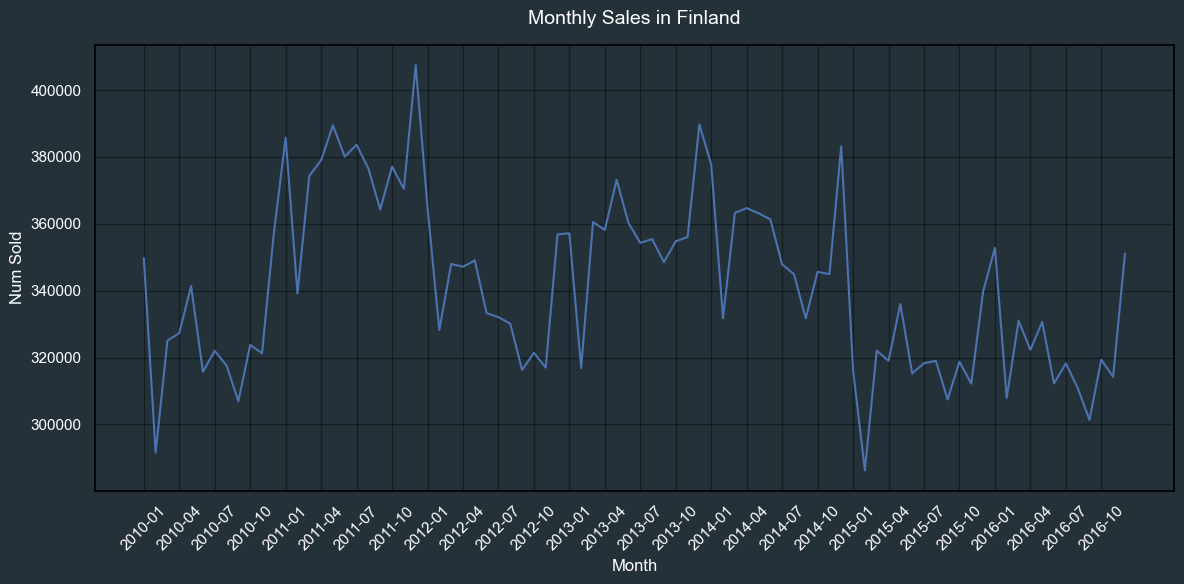

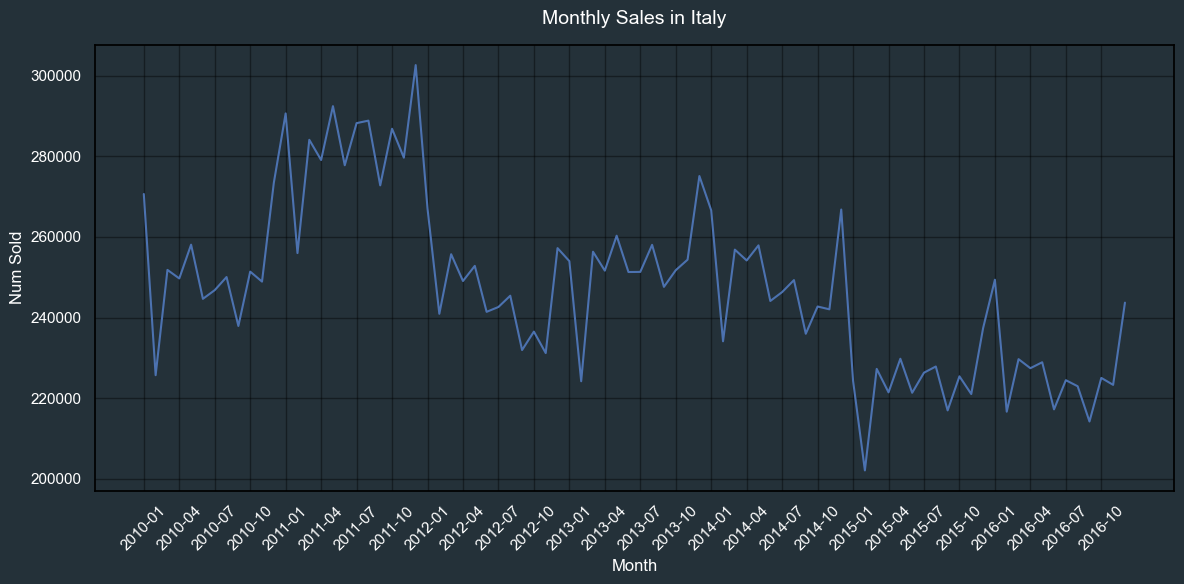

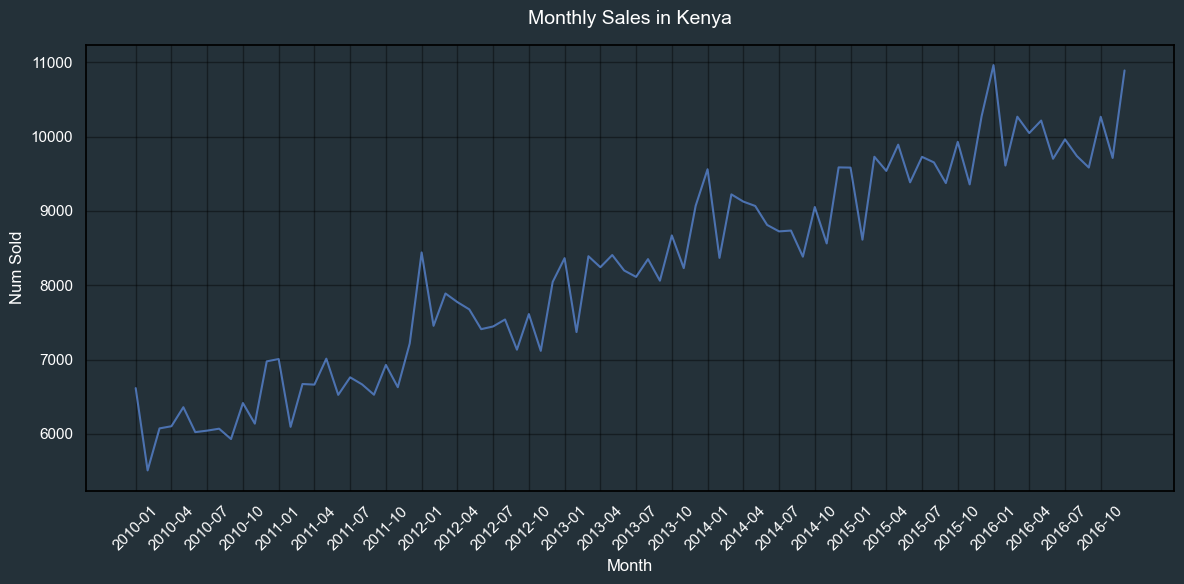

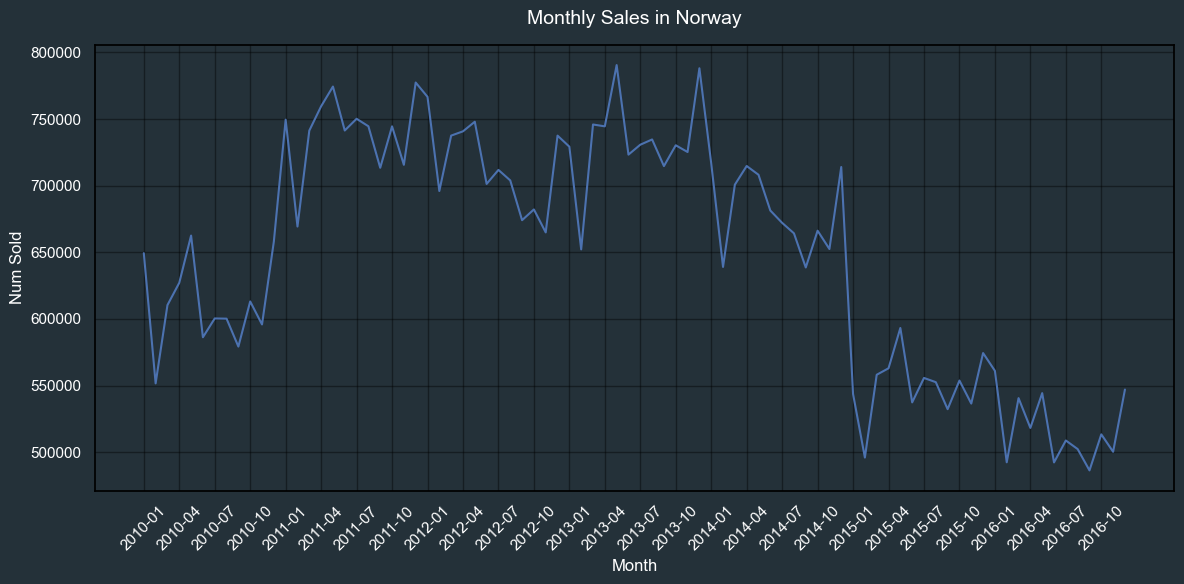

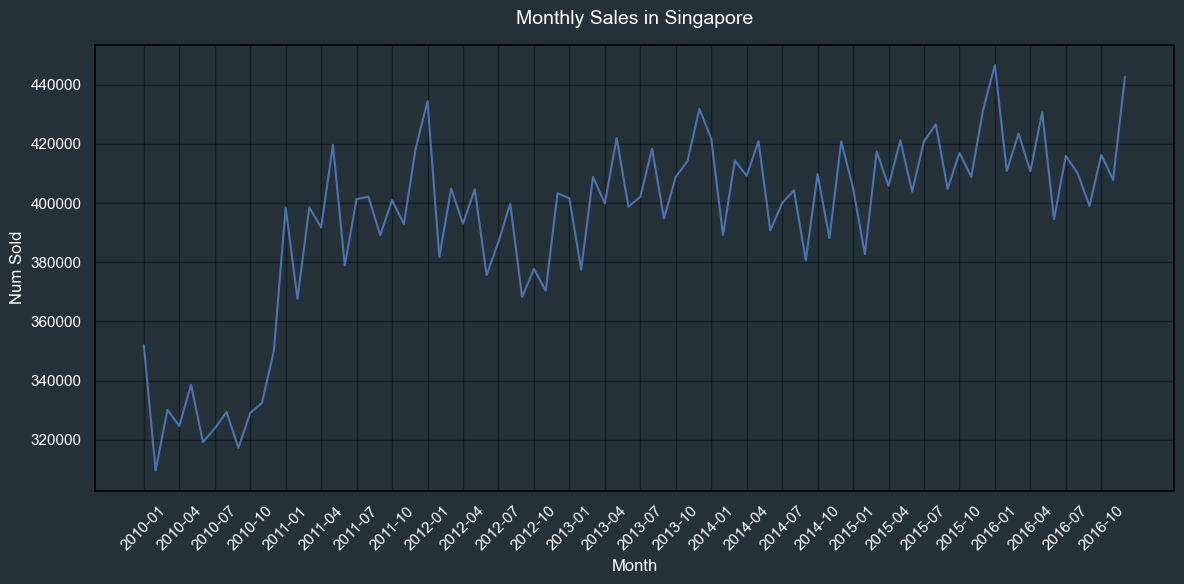

In [56]:
# Convert the 'date' column to datetime if not already
train['date'] = pd.to_datetime(train['date'])

# Group data by month and country
train['month'] = train['date'].dt.to_period('M').astype(str)
time_df = train.groupby(['month', 'country'], as_index=False)['num_sold'].sum()

# List of unique countries
countries = time_df['country'].unique()

# Loop through each country and create a line plot
for country in countries:
    country_data = time_df[time_df['country'] == country]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=country_data, x='month', y='num_sold')

    plt.title(f'Monthly Sales in {country}', fontsize=14, pad=15)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Num Sold', fontsize=12)
    plt.xticks(ticks=range(0, len(country_data['month']), 3), labels=country_data['month'][::3], rotation=45)

    plt.tight_layout()
    plt.show()

# clean train
train.drop('month',axis=1,inplace=True)

# Feature Engineering


In [58]:
train["num_sold"] = np.log1p(train["num_sold"])

In [59]:
# https://www.kaggle.com/code/vishnupriyagarige/forecasting-sticker-sales-with-xgb-lgb-catboost
def date_feature_engineering(df):
    """
    Performs feature engineering on a date column in the given DataFrame.
    Adds various date-related features to the DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing a 'date' column.

    Returns:
        pd.DataFrame: DataFrame with additional date features.
    """
    df['date'] = pd.to_datetime(df['date'])
    df['Year'] = df['date'].dt.year
    df['Quarter'] = df['date'].dt.quarter
    df['Month'] = df['date'].dt.month
    df['dayofmonth'] = df['date'].dt.day
   # df['day_of_week'] = df['date'].dt.day_name()
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['is_weekend'] = df['date'].dt.dayofweek.isin([5,6]).astype(int)
    df['is_month_end'] = df['date'].dt.is_month_end.astype(int)

    # Cyclical Features
    #df['day_sin'] = np.sin(2 * np.pi * df['dayofmonth'] / 365.0)
    #df['day_cos'] = np.cos(2 * np.pi * df['dayofmonth'] / 365.0)
    df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12.0)
    df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12.0)
    #df['year_sin'] = np.sin(2 * np.pi * df['Year'] / 7.0)
    #df['year_cos'] = np.cos(2 * np.pi * df['Year'] / 7.0)

    # Group Calculation
    df['Group'] = (df['Year'] - 2010) * 48 + df['Month'] * 4 + df['dayofmonth'] // 7
    
    return df

# Holidays
def get_holidays(df):
    years_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

    holiday_BE = holidays.CountryHoliday('BE', years = years_list)
    holiday_FR = holidays.CountryHoliday('FR', years = years_list)
    holiday_DE = holidays.CountryHoliday('DE', years = years_list)
    holiday_IT = holidays.CountryHoliday('IT', years = years_list)
    holiday_PL = holidays.CountryHoliday('PL', years = years_list)
    holiday_ES = holidays.CountryHoliday('ES', years = years_list)

    holiday_dict = holiday_BE.copy()
    holiday_dict.update(holiday_FR)
    holiday_dict.update(holiday_DE)
    holiday_dict.update(holiday_IT)
    holiday_dict.update(holiday_PL)
    holiday_dict.update(holiday_ES)

    df['holiday_name'] = df['date'].map(holiday_dict)
    df['is_holiday'] = np.where(df['holiday_name'].notnull(), 1, 0)
    df['holiday_name'] = df['holiday_name'].fillna('Not Holiday')
    df = df.drop(columns=["holiday_name"])
    
    return df

def periodic_spline_transformer(period, n_splines=None, degree=3):
    """
    Kaynak: https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html
    """
    
    if n_splines is None:
        n_splines = period
    n_knots = n_splines + 1  # periodic and include_bias is True
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation="periodic",
        include_bias=True)

def seasonality_spline_features(data):
    """
    Generate seasonality spline features for a given DataFrame.
    Assumes 'dayofmonth' exists
    """

    # Avoid duplicating 'dayofmonth' in the resulting DataFrame
    hour_df = data[['dayofmonth']].copy()
    splines = periodic_spline_transformer(32, n_splines=4).fit_transform(hour_df)
    splines_df = pd.DataFrame(splines, columns=[f"spline_{i}" for i in range(splines.shape[1])])

    # Return original data with only the spline features appended
    return pd.concat([data.reset_index(drop=True), splines_df], axis=1)


In [16]:
def create_date_features(data):

   # 1. Quarter
   data['quarter'] = data['date'].dt.quarter

   # 2. Month
   data['month'] = data['date'].dt.month 

   # 3. Day
   data['day'] = data['date'].dt.day

   # 4. Day of week
   data['day_of_week'] = data['date'].dt.dayofweek

   # 5. Day of year
   data['day_of_year'] = data['date'].dt.dayofyear

   # 6. Week of month
   data['week_of_month'] = data['date'].dt.day.apply(lambda x: (x-1)//7 + 1)

   # 7. Week of year
   data['week_of_year'] = data['date'].dt.isocalendar().week

   # 8. Is weekend
   data['is_weekend'] = data['date'].dt.dayofweek.isin([5,6]).astype(int)

   # 9. Is month end
   data['is_month_end'] = data['date'].dt.is_month_end.astype(int)

   # 10. Year
   data['year'] = data['date'].dt.year
    
   data['group'] = (data['year'] - 2010) * 48 + data['month'] * 4 + data['day'] // 7
   
   date_feats = [ 
                 'quarter',
                 'month',
                 'day',
                 'day_of_week',
                 'day_of_year',
                 'week_of_month',
                 'week_of_year',
                 'is_weekend',
                 'is_month_end',
                 'year',
                 'group']
   
   return data, date_feats

In [17]:
print(f'[INFO] Shapes:'
      f'\n train: {train.shape}'
      f'\n test: {test.shape}\n')

print(f'[INFO] Any missing values:'
      f'\n train: {train.isna().any().any()}'
      f'\n test: {test.isna().any().any()}\n')

train.head()

[INFO] Shapes:
 train: (230130, 6)
 test: (98550, 5)

[INFO] Any missing values:
 train: False
 test: False



,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,0.000000
65,65,2010-01-01,Norway,Stickers for Less,Holographic Goose,6.363028
64,64,2010-01-01,Norway,Discount Stickers,Kerneler Dark Mode,6.815640
63,63,2010-01-01,Norway,Discount Stickers,Kerneler,6.674561
62,62,2010-01-01,Norway,Discount Stickers,Kaggle Tiers,7.330405


In [60]:
import numpy as np
import pandas as pd
import holidays
from sklearn.preprocessing import SplineTransformer

# Target variable transformation
train["num_sold"] = np.log1p(train["num_sold"])

# Feature engineering
def create_date_features(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_month'] = df['date'].dt.day.apply(lambda x: (x-1)//7 + 1)
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['is_weekend'] = df['date'].dt.dayofweek.isin([5,6]).astype(int)
    df['is_month_end'] = df['date'].dt.is_month_end.astype(int)

    # Cyclical features
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12.0)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12.0)

    # Custom group feature
    df['group'] = (df['year'] - 2010) * 48 + df['month'] * 4 + df['day'] // 7

    # List of date features
    date_feats = ['year', 'quarter', 'month', 'day', 'day_of_week', 'day_of_year', 
                  'week_of_month', 'week_of_year', 'is_weekend', 'is_month_end', 
                  'month_sin', 'month_cos', 'group']
    
    return df, date_feats

# Holiday features
def get_holidays(df):
    years_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    countries = ['BE', 'FR', 'DE', 'IT', 'PL', 'ES']
    holiday_dict = {}

    for country in countries:
        holiday_dict.update(holidays.CountryHoliday(country, years=years_list))

    df['holiday_name'] = df['date'].map(holiday_dict)
    df['is_holiday'] = np.where(df['holiday_name'].notnull(), 1, 0)
    df['holiday_name'] = df['holiday_name'].fillna('Not Holiday')
    df = df.drop(columns=["holiday_name"])
    
    return df

# Spline features
def periodic_spline_transformer(period, n_splines=None, degree=3):
    if n_splines is None:
        n_splines = period
    n_knots = n_splines + 1  # periodic and include_bias is True
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation="periodic",
        include_bias=True)

def seasonality_spline_features(data):
    hour_df = data[['day']].copy()
    splines = periodic_spline_transformer(32, n_splines=4).fit_transform(hour_df)
    splines_df = pd.DataFrame(splines, columns=[f"spline_{i}" for i in range(splines.shape[1])])
    return pd.concat([data.reset_index(drop=True), splines_df], axis=1)

# Apply feature engineering
train, date_feats = create_date_features(train)
train = get_holidays(train)
train = seasonality_spline_features(train)

# Debugging and logging
print(f'[INFO] Shapes:'
      f'\n train: {train.shape}'
      f'\n test: {test.shape}\n')

print(f'[INFO] Any missing values:'
      f'\n train: {train.isna().any().any()}'
      f'\n test: {test.isna().any().any()}\n')

train.head()

[INFO] Shapes:
 train: (230130, 24)
 test: (98550, 5)

[INFO] Any missing values:
 train: False
 test: False



,id,date,country,store,product,num_sold,year,quarter,month,day,day_of_week,day_of_year,week_of_month,week_of_year,is_weekend,is_month_end,month_sin,month_cos,group,is_holiday,spline_0,spline_1,spline_2,spline_3
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,0.000000,2010,1,1,1,4,1,1,53,0,0,0.5,0.866025,4,1,0.111654,0.652018,0.236003,0.000326
1,65,2010-01-01,Norway,Stickers for Less,Holographic Goose,1.097435,2010,1,1,1,4,1,1,53,0,0,0.5,0.866025,4,1,0.111654,0.652018,0.236003,0.000326
2,64,2010-01-01,Norway,Discount Stickers,Kerneler Dark Mode,1.117148,2010,1,1,1,4,1,1,53,0,0,0.5,0.866025,4,1,0.111654,0.652018,0.236003,0.000326
3,63,2010-01-01,Norway,Discount Stickers,Kerneler,1.111170,2010,1,1,1,4,1,1,53,0,0,0.5,0.866025,4,1,0.111654,0.652018,0.236003,0.000326
4,62,2010-01-01,Norway,Discount Stickers,Kaggle Tiers,1.137805,2010,1,1,1,4,1,1,53,0,0,0.5,0.866025,4,1,0.111654,0.652018,0.236003,0.000326


# Model Training



In [61]:
class Regressor:
    def __init__(self, n_estimators=1000, device="cpu", random_state=42):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.models_name = list(self._define_model().keys())
        self.len_models = len(self.models)
        
    def _define_model(self):
                
        xgb_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.171655957085321,
            'booster': 'gbtree',
            'lambda': 0.0856890877950814,
            'alpha': 0.000223555755009136,
            'subsample': 0.817828998442447,
            'colsample_bytree': 0.247566473896556,
            'max_depth': 9,
            'min_child_weight': 6,
            'eta': 0.0000146950106167549,
            'gamma': 0.0315067984172879,
            'grow_policy': 'depthwise',
            'n_jobs': -1,
            'objective': 'reg:squarederror', # reg:pseudohubererror
            'eval_metric': 'mape',
            'verbosity': 0,
            'random_state': self.random_state,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
        
        lgb_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.919954028302801,
            "reg_alpha": 0.00424724917570821,
            "reg_lambda": 1.02450316198987E-06,
            "num_leaves": 103,
            "colsample_bytree": 0.661659900143368,
            'subsample': 0.704065754123,
            'subsample_freq': 6,
            'min_child_samples': 100,
            #'objective': 'regression_l2',
            #'metric': 'mape',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state
        }

        lgb1_params = {
            'n_estimators': 3946,
            'learning_rate': 0.10203344298643195,
            'max_depth': 15,
            'num_leaves': 20,
            'min_child_samples': 39,
            'subsample': 0.7786665459484634,
            'colsample_bytree': 0.7352055562065795,
            'reg_alpha': 0.2840216195298897,
            'reg_lambda': 6.583320975256993,
            "verbosity" : -1 
        }

        lgb2_params = {
            'n_estimators': 972, 'learning_rate': 0.07886835774940058, 'num_leaves': 70, 'max_depth': 11, 'min_child_samples': 33, 'min_child_weight': 0.0034200823993429507, 'subsample': 0.9066501031637197, 'colsample_bytree': 0.5400387926077018, 'reg_alpha': 0.004372010855425869, 'verbosity': -1,
            'reg_lambda': 0.0014856980584924064,
        }

        lgb3_params = {
            'n_estimators': 1200,
            'learning_rate': 0.08306802241500667,
            'max_depth': 10,
            'reg_alpha': 0.00012579497472025837, 'lambda_l2': 0.00047494948934310007, 'min_child_samples': 68, 'colsample_bytree': 0.9579325891323452, 'subsample': 0.5843341782698147,
            'verbosity':-1
        }
  
        models = {
          #  "lad": LADRegression(),
            "xgb_base": xgb.XGBRegressor(),
            "lgb_base": lgb.LGBMRegressor(verbosity=-1),
            "xgb": xgb.XGBRegressor(**xgb_params),
            "lgb": lgb.LGBMRegressor(**lgb_params),
            "lgb1": lgb.LGBMRegressor(**lgb1_params),
            "lgb2": lgb.LGBMRegressor(**lgb2_params),
            "lgb3": lgb.LGBMRegressor(**lgb3_params)
        }
        
        return models

In [62]:
# Idea: https://www.kaggle.com/code/onurkoc83/time-based-cross-validation

# Label encode categorical features
label_encoders = {}
for feature in cat_features:
    label_encoders[feature] = LabelEncoder()
    train[f'{feature}_encoded'] = label_encoders[feature].fit_transform(train[feature])

# Update cat_features to use encoded versions
encoded_cat_features = [f'{feature}_encoded' for feature in cat_features]

# ANSI color codes
BLUE = '\033[94m'
RED = '\033[91m'
GREEN = '\033[92m'
RESET = '\033[0m'  # Reset color formatting

# Function to create splits for a single category combination
def create_splits(category_data, n_splits=5):
    splits = []
    dates = category_data['date'].sort_values().unique()
    n_dates = len(dates)
    
    # Calculate validation size (approximately 20% of total data)
    val_size = int(n_dates * 0.2)
    
    # Calculate initial training size
    initial_train_size = int(n_dates * 0.4)  # Start with 40% of data
    
    # Calculate step size for sliding
    remaining_points = n_dates - initial_train_size - val_size
    if remaining_points < n_splits - 1:
        return []
        
    step_size = remaining_points // (n_splits - 1)
    
    for i in range(n_splits):
        train_end_idx = initial_train_size + (i * step_size)
        val_end_idx = train_end_idx + val_size
        
        if val_end_idx > n_dates:
            break
            
        train_dates = dates[:train_end_idx]
        val_dates = dates[train_end_idx:val_end_idx]
        
        splits.append((train_dates, val_dates))
    
    return splits

# Initialize lists to store results
all_mapes = []

# Get unique category combinations
category_combinations = train.groupby(cat_features).size().reset_index()[cat_features]

# Create 5 folds
for fold in range(5):
    print(f"\nFold {fold + 1}:")
    print()
    # Initialize lists to store train and validation indices for this fold
    train_indices = []
    val_indices = []
    
    # Process each category combination
    for idx, cat_combo in category_combinations.iterrows():
        # Get data for this category combination
        mask = True
        for feat, value in cat_combo.items():
            mask = mask & (train[feat] == value)
        category_data = train[mask].copy()
            
        # Create splits for this category
        splits = create_splits(category_data, n_splits=5)
        
        if splits and fold < len(splits):  # Only proceed if we have enough data for this fold
            train_dates, val_dates = splits[fold]
            
            # Add indices to our lists
            train_indices.extend(category_data[category_data['date'].isin(train_dates)].index)
            val_indices.extend(category_data[category_data['date'].isin(val_dates)].index)
    
    # Create train and validation sets
    train_data = train.loc[train_indices]
    val_data = train.loc[val_indices]
    
    # Print date ranges and shapes with colors
    print(f"{BLUE}Train date range: {train_data['date'].dt.date.min()} to {train_data['date'].dt.date.max()}")
    print(f"Val date range: {val_data['date'].dt.date.min()} to {val_data['date'].dt.date.max()}{RESET}")
    print()  # Add empty line between date ranges and shapes
    print(f"{RED}Train shape: {train_data.shape}")
    print(f"Val shape: {val_data.shape}{RESET}")
    print()  # Add empty line between shapes and MAPE
    
    # Apply the function to train and validation data
    #date_feats = ["Year", "Quarter", "Month", "dayofmonth", "week_of_year", "Group", "is_holiday", "is_weekend", "is_month_end"]

    # Apply the function to train and validation data
    train_data, date_feats = create_date_features(train_data)
    val_data, _ = create_date_features(val_data)
    
    # Update feature columns
    feature_cols = encoded_cat_features + date_feats

    X_train = train_data[feature_cols]
    X_val = val_data[feature_cols]
    y_train = train_data['num_sold']
    y_val = val_data['num_sold']

    print(X_train.shape)

    
    # Train model
    regressor = Regressor()
    model = regressor.models["lgb3"]

    # model = lgb.LGBMRegressor(
    #                     n_estimators=2000,
    #                     boosting_type='gbdt',
    #                     verbosity=-1,
    #                     categorical_feature=encoded_cat_features,
    #                     learning_rate= 0.10203344298643195,
    #                     max_depth = 5,
    #                     # num_leaves = 20,
    #                     # min_child_samples = 39,
    #                     # subsample = 0.7786665459484634,
    #                     # colsample_bytree = 0.7352055562065795,
    #                     # reg_alpha = 0.2840216195298897,
    #                     # reg_lambda = 6.583320975256993,
    #                     random_state=42
    # )
    
    model.fit(
        X_train, 
        y_train,
        # categorical_feature=["country_encoded",	"store_encoded",
        #                      "product_encoded", "Year", "Quarter", "Month", "dayofmonth",
        #                      "week_of_year", "Group", "is_holiday"],
        #categorical_feature=encoded_cat_features
    )
    
    # Make predictions
    val_preds = model.predict(X_val)
    
    # Calculate and print MAPE with color
    mape = mean_absolute_percentage_error(y_val, val_preds)
    all_mapes.append(mape)
    print(f"{GREEN}Fold {fold + 1} MAPE: {mape:.4f}{RESET}")
    print()  # Add empty line after MAPE

# Print average MAPE

valid_mapes = [m for m in all_mapes if not np.isnan(m)]
if valid_mapes:
    print(f"\n{GREEN}Average MAPE across all folds: {np.mean(valid_mapes):.4f}{RESET}")
else:
    print("\nNo valid MAPE scores calculated")


Fold 1:

Train date range: 2010-01-01 to 2012-10-18
Val date range: 2012-10-19 to 2014-03-13

Train shape: (91980, 27)
Val shape: (45990, 27)

(91980, 16)
Fold 1 MAPE: 12088119063583.1035


Fold 2:

Train date range: 2010-01-01 to 2013-07-01
Val date range: 2013-07-02 to 2014-11-24

Train shape: (115020, 27)
Val shape: (45990, 27)

(115020, 16)
Fold 2 MAPE: 13228828894703.6562


Fold 3:

Train date range: 2010-01-01 to 2014-03-14
Val date range: 2014-03-15 to 2015-08-07

Train shape: (138060, 27)
Val shape: (45990, 27)

(138060, 16)
Fold 3 MAPE: 30407986057034.2969


Fold 4:

Train date range: 2010-01-01 to 2014-11-25
Val date range: 2014-11-26 to 2016-04-19

Train shape: (161100, 27)
Val shape: (45990, 27)

(161100, 16)
Fold 4 MAPE: 32976872399263.6797


Fold 5:

Train date range: 2010-01-01 to 2015-08-08
Val date range: 2015-08-09 to 2016-12-31

Train shape: (184140, 27)
Val shape: (45990, 27)

(184140, 16)
Fold 5 MAPE: 15657499194765.1230


Average MAPE across all folds: 2087186112